In [1]:
!pip3 install imblearn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.

Missing data, or missing values, occur when you don't have data stored for certain variables or participants. Data can go missing due to incomplete data entry, equipment malfunctions, lost files, and many other reasons. In any dataset, there are usually some missing data. In quantitative research, missing values appear as blank cells in your spreadsheet.

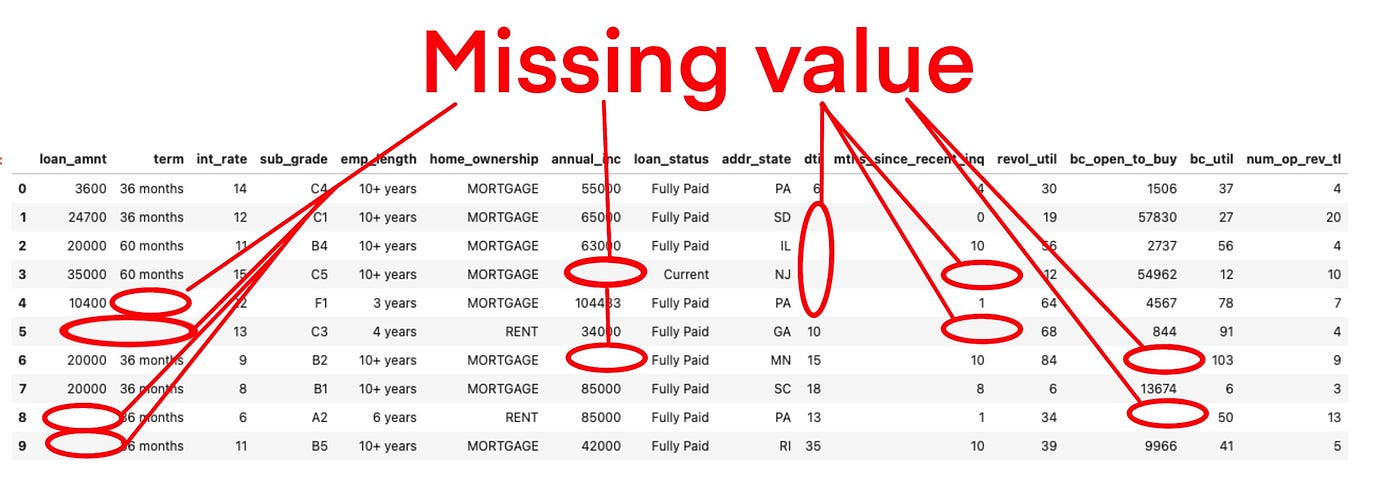

**The reasons for why it is essential to handle missing values are as follows:*

1. Missing values can lead to inaccurate conclusions about the data which can significantly impact the accuracy of the analysis.
2. Many machine learning algorithms fail if the dataset contains missing values.
3. Missing values may lead to biased result being produced by the model.
4. Missing values can also lead to imbalanced dataset.
5. It can also lead to lack of precision in statistical analysis.


**Alogorithms that are not affected by missing values are as follows:**

1. K-Nearest Neighbours(KNN)
2. Naive Bayes
3. XGBoost
4. LightGBM
5. Random Forest
6. Some trees implementation like Decision Trees

## Q2: List down techniques used to handle missing data.  Give an example of each with python code.

There are multiple techniques to handle missing data. The techniques are discussed below.

In [3]:
# importing dataset having missing values
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Shape of the dataframe
df.shape

(891, 15)

In [5]:
# Watching for missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

So we can observe that the above dataset has a lot of null valuesfor columns **age**, **embarked**, **deck** and **embark_town**

Below are the ways for handling the missing data.

#### 1. Dropping the rows(datapoints) which contains null values

In [6]:
df_row_dropped = df.dropna(inplace=False)
df_row_dropped.shape

(182, 15)

So we can observe that we have lost quite a bit of data due to removal of the datapoints which is not a good decision.

#### 2. Dropping the columns having missing values

In [7]:
df_column_dropped = df.dropna(axis=1, inplace=False)
print(df_column_dropped.shape)
df_column_dropped.head()

(891, 11)


,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


The columns having missing values are dropped which are 4 in number hence the shape reduced to (891, 11) after dropping these columns.

There is another technique for the resolving the missing values which is known as **Imputation**.

#### 3. Imputation

#### 3.1 Imputation by Mean

In this technique we replace the missing values by the mean of the data of that column. This technique is usually followed when the data is **Normally Distributed**. Additionally, this mode of imputation can only be done with Numerical columns.

In [8]:
# Let's check if the data is Normally Distributed
# The numerical column which has missing value is "age"
print("Number of missing values in age column: ", df["age"].isna().sum())
mean = df["age"].mean()
df["age_filled"] = df["age"].fillna(value= mean, inplace=False)
df[["age", "age_filled"]]

Number of missing values in age column:  177


,age,age_filled
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


In [9]:
print("Number of missing values in age column after Mean Imputation: ", df["age_filled"].isna().sum())

Number of missing values in age column after Mean Imputation:  0


#### 3.2 Imputation by Median

In this technique, we replace the missing values by the mean value of that column. This technique is also used for Numerical columns. The technique should be used when there is outliers in the dataset.

<AxesSubplot:>

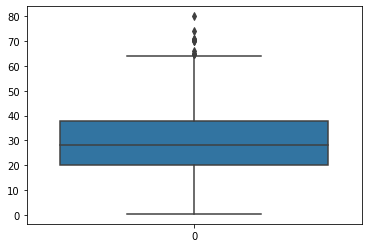

In [10]:
# Let's verify if the age numerical column has any outliers or not
sns.boxplot(df["age"])

In [11]:
median = df["age"].median()
df["age_filled_median"] = df["age"].fillna(value=median, inplace=False)
df[["age", "age_filled_median"]]

,age,age_filled_median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


#### 3.3 Imputation by Mode

In this technique, we replace the missing values by the mode of that variable. It is mainly used for categorical variables.

In [12]:
# Here "embarked" is a categorical variable
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
mode = df[df["embarked"].notna()]["embarked"].mode()[0]
df["embarked_filled_mode"] = df["embarked"].fillna(value=mode, inplace= False)
df[["embarked", "embarked_filled_mode"]][df["embarked"].isnull()]

,embarked,embarked_filled_mode
61,NaN,S
829,NaN,S


#### 4. Replacing with the previous value – forward fill

In some cases, imputing the values with the previous value instead of the mean, mode, or median is more appropriate. This is called forward fill. It is mostly used in time series data. You can use the ‘fillna’ function with the parameter ‘method = ffill’

In [14]:
df["embarked_forward_filled"] = df["embarked"].fillna(method="ffill", inplace=False)
df[["embarked", "embarked_forward_filled"]][df["embarked"].isnull()]

,embarked,embarked_forward_filled
61,NaN,C
829,NaN,Q


#### 5. Replacing with the next value – backward fill

In backward fill, the missing value is imputed using the next value.

In [15]:
df["embarked_backward_filled"] = df["embarked"].fillna(method="bfill", inplace=False)
df[["embarked", "embarked_backward_filled"]][df["embarked"].isnull()]

,embarked,embarked_backward_filled
61,NaN,S
829,NaN,C


#### 6. Replacing with a random or arbitrary value

In this technique, we replace the missing values with any of the random value of that column or a guessed value.

In [16]:
random_val = 31
df["age_filled_arbitrary"] = df["age"].fillna(value=random_val, inplace=False)
df[["age", "age_filled_arbitrary"]][df["age"].isnull()]

,age,age_filled_arbitrary
5,NaN,31.0
17,NaN,31.0
19,NaN,31.0
26,NaN,31.0
28,NaN,31.0
...,...,...
859,NaN,31.0
863,NaN,31.0
868,NaN,31.0
878,NaN,31.0


## Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

**Imbalanced Dataset** - A classification data set with skewed class proportions is called **imbalanced**. Classes that make up a large proportion of the data set are called **majority classes**. Those that make up a smaller proportion are **minority classes**.

Let’s assume that XYZ is a bank that issues a credit card to its customers. Now the bank is concerned that some fraudulent transactions are going on and when the bank checks their data they found that for each 2000 transaction there are only 30 Nos of fraud recorded. So, the number of fraud per 100 transactions is less than 2%, or we can say more than 98% transaction is “No Fraud” in nature. Here, the class “No Fraud” is called the majority class, and the much smaller in size “Fraud” class is called the minority class.

More such example of imbalanced data is –

1. Disease diagnosis
2. Customer churn prediction
3. Fraud detection
4. Natural disaster

**Impact of Imbalanced Dataset**

1. The main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class. The model will always be biased towards the majority class.
2. The data will be skewed and hence the statistical analysis will also be biased towards the majority class.
3. In most of the cases, model prediction for the minority class will be incorrect.

## Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and downsampling are required.

There are various sampling techniques used to handle the imbalanced datasets.

1. **Up-sampling** - When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique is called oversampling or upsampling. It also means adding an example weight to the downsampled class equal to the factor by which you downsampled.

2. **Down-sampling** - We can randomly delete rows from the majority class to match them with the minority class which is called undersampling or down-sampling.

So, when both classes have a similar number of records present in the dataset, we can assume that the classifier will give equal importance to both classes.

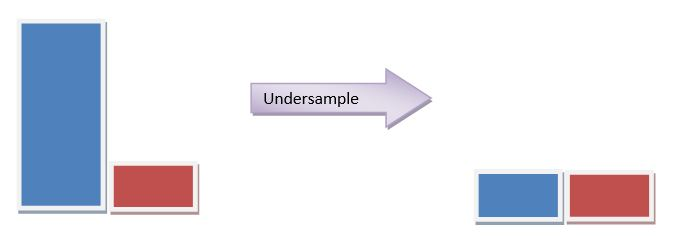

credit card    4577
cash           1812
Name: payment, dtype: int64


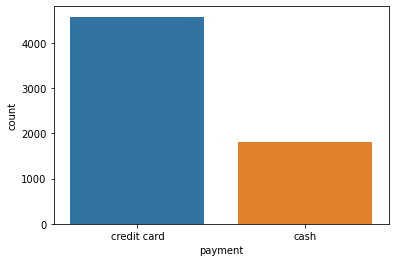

In [17]:
taxis_df = sns.load_dataset("taxis")
taxis_df.head()
print(taxis_df["payment"].value_counts())
sns.countplot(x = taxis_df["payment"])
plt.show()

So in the above dataset, we can observe that the mode of payment is imbalanced since the mode of payment by credit card is much more compared to the mode of payment by cash.

#### Up-Sampling or Oversampling

For the above example, we will try to upsample the data points for the cash mode of payment.

In [18]:
taxis_df_majority = taxis_df[taxis_df["payment"] == "credit card"]
taxis_df_minority = taxis_df[taxis_df["payment"] == "cash"]

print(f"Minority len = {len(taxis_df_minority)} and Majority length = {len(taxis_df_majority)}")

Minority len = 1812 and Majority length = 4577


In [19]:
from sklearn.utils import resample

taxis_df_minority_upsampled = resample(taxis_df_minority, replace=True, n_samples=len(taxis_df_majority), random_state=42)
print("Size of minority class after up-sampling = ", len(taxis_df_minority_upsampled))

Size of minority class after up-sampling =  4577


In [20]:
taxis_df_minority_upsampled.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
4295,2019-03-26 12:02:20,2019-03-26 12:32:00,1,7.42,27.5,0.0,0.0,30.8,yellow,cash,Times Sq/Theatre District,World Trade Center,Manhattan,Manhattan
5576,2019-03-26 11:25:33,2019-03-26 11:31:25,1,0.88,6.0,0.0,0.0,6.8,green,cash,East Harlem North,East Harlem North,Manhattan,Manhattan
3285,2019-03-15 19:10:40,2019-03-15 19:34:45,1,3.80,17.0,0.0,0.0,21.3,yellow,cash,SoHo,Lincoln Square East,Manhattan,Manhattan
4979,2019-03-31 17:51:34,2019-03-31 18:03:56,1,1.40,9.5,0.0,0.0,12.8,yellow,cash,Garment District,West Chelsea/Hudson Yards,Manhattan,Manhattan
4301,2019-03-03 17:48:31,2019-03-03 17:57:40,1,1.30,8.0,0.0,0.0,11.3,yellow,cash,Manhattan Valley,Upper West Side South,Manhattan,Manhattan


#### Down-Sampling or Undersampling

#### Up-Sampling or Oversampling

For the above example, we will try to upsample the data points for the credit card mode of payment.

In [21]:
taxis_df_majority_downsampled = resample(taxis_df_majority, replace=False, n_samples=len(taxis_df_minority), random_state=42)
print("Size of majority class after down-sampling = ", len(taxis_df_majority_downsampled))

Size of majority class after down-sampling =  1812


In [22]:
taxis_df_majority_downsampled.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
2264,2019-03-23 15:38:12,2019-03-23 15:48:10,1,0.86,7.5,2.16,0.0,12.96,yellow,credit card,Union Sq,West Village,Manhattan,Manhattan
2282,2019-03-12 08:07:08,2019-03-12 08:10:50,2,1.11,5.5,2.64,0.0,11.44,yellow,credit card,Midtown South,Midtown Center,Manhattan,Manhattan
2092,2019-03-29 12:12:12,2019-03-29 12:18:06,1,1.07,6.5,1.00,0.0,10.80,yellow,credit card,Upper West Side South,Upper East Side South,Manhattan,Manhattan
3847,2019-03-21 20:25:40,2019-03-21 20:51:40,1,14.90,40.0,8.25,0.0,49.55,yellow,credit card,JFK Airport,Steinway,Queens,Queens
6352,2019-03-28 12:46:54,2019-03-28 12:51:24,1,0.55,5.0,0.58,0.0,6.38,green,credit card,Morningside Heights,Morningside Heights,Manhattan,Manhattan


## Q5: What is Data Augmentation? Explain SMOTE.

**Data Augmentation** - Data Augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.

#### Reasons for when to use Data Augmentation

1. To prevent models from overfitting.
2. The initial training set is too small.
3. To improve the model accuracy.
4. To Reduce the operational cost of labeling and cleaning the raw dataset.

#### <u> SMOTE(Synthetic Minority Oversampling Technique) </u>

**SMOTE** is a technique used in Machine Learning to address **imbalanced datasets** where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances. Imbalanced dataset pose a common challenge for machine learning practitioners in binary classification problems. This scenario frequently arises in practical business applications like fraud detection, spam filtering, rare disease discovery, and hardware fault detection. To address this issue, one popular technique is Synthetic Minority Oversampling Technique (SMOTE). SMOTE is specifically designed to tackle imbalanced datasets by generating synthetic samples for the minority class.

This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

#### <u> Working Procedure of SMOTE:</u>

At first the total no. of oversampling observations, **N** is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. This is pictorially represented below:

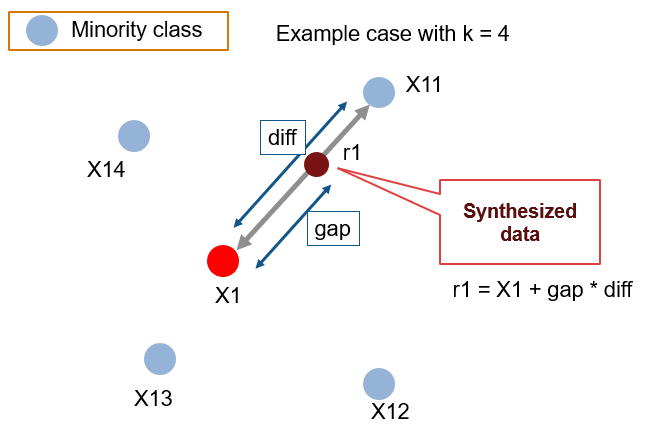

**Though this algorithm is quite useful, it has few drawbacks associated with it which are as follows:**

1. The synthetic instances generated are in the same direction i.e. connected by an artificial line its diagonal instances. This in turn complicates the decision surface generated by few classifier algorithms.
2. SMOTE tends to create a large no. of noisy data points in feature space.

#### <u> Augmented vs. Synthetic data </u>

**Augmented data** is driven from original data with some minor changes. In the case of image augmentation, we make geometric and color space transformations (flipping, resizing, cropping, brightness, contrast) to increase the size and diversity of the training set. 

**Synthetic data** is generated artificially without using the original dataset. It often uses **DNNs (Deep Neural Networks)** and **GANs (Generative Adversarial Networks)** to generate synthetic data. 

**Note:** The augmentation techniques are not limited to images. We can augment audio, video, text, and other types of data too.

#### SMOTE Example

In [23]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_redundant=0, n_features=2,weights=[0.9],random_state=42)
df1 = pd.DataFrame(X, columns=["f1", "f2"])
df2 = pd.DataFrame(y, columns=["target"])
df = pd.concat([df1, df2], axis = 1)
df.head()

,f1,f2,target
0,-0.058619,-0.351090,0
1,1.246686,1.153597,1
2,0.962777,0.859397,1
3,-2.957441,2.033645,1
4,0.871229,-1.205785,0


In [24]:
df["target"].value_counts()

0    895
1    105
Name: target, dtype: int64

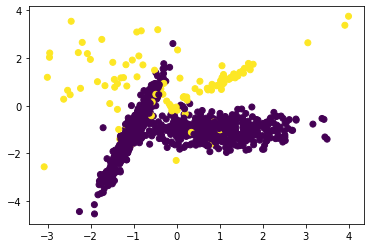

In [25]:
plt.scatter(x=df["f1"], y=df["f2"], c=df["target"])

So there is an imbalance in the dataset as the number of datapoints having 0 as classification are more compared to datapoints having 1 as classification result.

In [26]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X1, y1 = oversample.fit_resample(df[["f1", "f2"]], df["target"])

df11 = pd.DataFrame(X1, columns=["f1", "f2"])
df12 = pd.DataFrame(y1, columns=["target"])
df_final = pd.concat([df11, df12], axis = 1)
df_final.head()

,f1,f2,target
0,-0.058619,-0.351090,0
1,1.246686,1.153597,1
2,0.962777,0.859397,1
3,-2.957441,2.033645,1
4,0.871229,-1.205785,0


In [27]:
df_final["target"].value_counts()

0    895
1    895
Name: target, dtype: int64

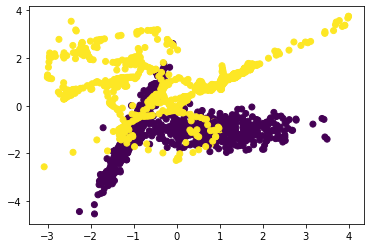

In [28]:
plt.scatter(x=df_final["f1"], y=df_final["f2"], c=df_final["target"])

## Q6: What are outliers in a dataset? Why is it essential to handle outliers?

An **outlier** is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset we are working with. They vary greatly from the others—they’re either much larger, or significantly smaller. Outliers may indicate variabilities in a measurement, experimental errors, or a novelty.

#### The reasons for handling outliers are as follows:

1. Outliers may have a negative effect on the result of an analysis
2. Outliers—or their behavior—may be the information that a data analyst requires from the analysis
3. It is important to identify if the outlier is because of erroneous measurements or not. If not, then it might be an important datapoint to ignore.

One of the techniques to hadle Outliers is by plotting the data usign QQ plot which help to visualize the IQR(Inter Quartile Range) to identify the outliers.

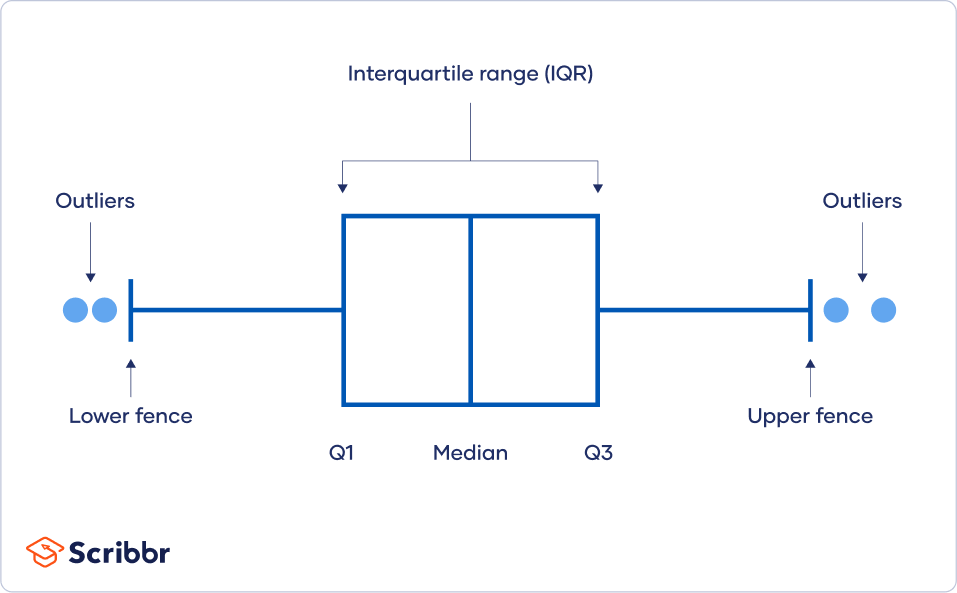

## Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?

There are different techniques to handle the missing data. Those techniques are discussed as follows:

1. **Deletion** - we can either delete the row or the column containing the missing data but it can lead to loss of data and the model being trained in a biased manner.

2. **Imputation** - In this technique, we impute the missing data based on the available data for that variable. There are various techniques like - imputation by mean and median (for numerical variables) and imputation by mode (for categorical variables). Although these are good techniques but can lead to biased result.

3. **Multiple Imputation** - Multiple imputation entails two stages:  
    **a.** Generating replacement values (“imputations”) for missing data and repeating this procedure many times, resulting in many data sets with replaced missing information  
    **b.** Analyzing the many imputed data sets and combining the results.
    
4. **Regression** - This technique can be used when there is a strong correlation between missing data and the dataset. This technique can help to replace the missing values as well.

5. **Machine Learning** - Machine Learning models can be used to impute the missing values if the relationship between the missing data points and the dataset.

Although there are different techniques to handle missing data but no one technique can be labelled as the best. It all depends on the type of missing data, the relationship between the missing data and the dataset, the size of the dataset, etc. The techniques should be tried in a hit and trial method and the effectiveness of any such technique is calculated based on the statistical analysis.

## Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?

There are several techniques or strategies to identify if the data is Missing at Random(MAR) or if there is a pattern to it. Some of these techniques are discussed below:

1. **Missing Pattern Analyzing** - We can plot the missing data columns to observe the pattern in which they are missing. If the pattern of missingness is random across different variables, then we can say that the data is missing at random. But if observe if some variable has higher number of missing values compared to other variables, then we can say that there is pattern in missing data.

2. **Correlation Analysis** - We can plot correlation matrix of for the missing data along side the other columns. If the missing data shows high correlation with other variables then the missing data has some pattern. On the other hand, if there is no correlation, then data is missing at random.

3. **Domain Knowledge** - Sometimes domain knowledge on the dataset and experts on that domain can help identify if the data is missing at random or if there is a pattern in missing due to some anomalies or is it expected to happen.

4. **Statistics Test** - We can use Little's MCAR test to identify if the data is missing at random. These tests can help determine if the pattern of missing data can be explained by chance or if there is a systematic reason for the missing data.


We can either use any one or a combination of the above techniques to identify the pattern behind the missing data so that they can be imputed accordingly.

## Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?

In Medical Diagnosis, it is a very common phenomenon of finding imbalanced datasets. The following are some of the techniques to handle such imbalanced datasets:

1. **Choose Proper Evaluation Metric** - The **accuracy** of a classifier is the total number of correct predictions by the classifier divided by the total number of predictions. This may be good enough for a well-balanced class but not ideal for the imbalanced class problem. The other metrics such as **precision** is the measure of how accurate the classifier’s prediction of a specific class and **recall** is the measure of the classifier’s ability to identify a class.

    For an imbalanced class dataset F1 score is a more appropriate metric. It is the harmonic mean of precision and recall and the expression is –

$$F_{1} = 2 * \frac{precision * recall}{precision + recall}$$

    So, if the classifier predicts the minority class but the prediction is erroneous and false-positive increases, the precision metric will be low and so as F1 score. Also, if the classifier identifies the minority class poorly, i.e. more of this class wrongfully predicted as the majority class then false negatives will increase, so recall and F1 score will low. F1 score only increases if both the number and quality of prediction improves.  

2. **Resampling (Oversampling and Undersampling)** - This technique is used to upsample or downsample the minority or majority class. When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique is called oversampling. Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling. After sampling the data we can get a balanced dataset for both majority and minority classes. So, when both classes have a similar number of records present in the dataset, we can assume that the classifier will give equal importance to both classes.

3. **SMOTE** - SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

4. **BalancedBaggingClassifier** - When we try to use a usual classifier to classify an imbalanced dataset, the model favors the majority class due to its larger volume presence. A BalancedBaggingClassifier is the same as a sklearn classifier but with additional balancing. It includes an additional step to balance the training set at the time of fit for a given sampler. This classifier takes two special parameters “sampling_strategy” and “replacement”. The sampling_strategy decides the type of resampling required (e.g. ‘majority’ – resample only the majority class, ‘all’ – resample all classes, etc) and replacement decides whether it is going to be a sample with replacement or not.

5. **Threshold moving** - In the case of our classifiers, many times classifiers actually predict the probability of class membership. We assign those prediction’s probabilities to a certain class based on a threshold which is usually 0.5, i.e. if the probabilities < 0.5 it belongs to a certain class, and if not it belongs to the other class.

    For imbalanced class problems, this default threshold may not work properly. We need to change the threshold to the optimum value so that it can efficiently separate two classes. We can use ROC Curves and Precision-Recall Curves to find the optimal threshold for the classifier. We can also use a grid search method or search within a set of values to identify the optimal value.

## Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?

The techniques used for balancing an imbalanced dataset and downsampling the majority class are as follows:

1. **Random Undersampling** - This technique involves removal or deletion of random rows from the majority class. The down side of this technique is that it leads to loss of data.

2. **Clustering Based Undersampling** - This technique involves representation of majority class using clusters and then selecting a few representers of that cluster but it also leads to loss of data.

3. **Tomek Links** - This method is an under-sampling technique that identifies pairs of instances from different classes that are close to each other, and removes the majority class instance from each pair. By doing this, the Tomek Links method creates a clearer separation between the two classes.

4. **Edited Nearest Neighbors (ENN)** - This method is also an under-sampling technique that removes noisy or mislabeled instances by checking the class of each instance's nearest neighbors. If an instance's nearest neighbors are mostly from a different class, then the instance is removed. ENN can be applied after other under-sampling or over-sampling techniques to further improve the balance of the dataset.

5. **Ensemble-based methods** - These methods involve training multiple models on different subsets of the data, and then combining the results to produce a final prediction. This can be particularly useful in cases where the dataset is highly imbalanced and standard methods may not be effective.

There is no best fit for any of these above techniques to any imbalanced dataset. The technique depends on the characteristic of the dataset and the goal of analysis.

## Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?

There are a few upsampling techniques that can be used to oversample ta dataset in order to predict a rare event correctly having low percentage of occurrences.

1. **Random Upsampling** - This technique involves addition of random data points for the minority class. The drawback is that it can result in overfitting of the model.

2. **SMOTE(Synthe Minority Oversampling Technique)** - SMOTE is a technique used in Machine Learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

3. **Adaptive Synthetic Sampling (ADASYN)** - This method is an extension of SMOTE that generates more synthetic instances in the minority class regions that are harder to learn by the classifier. The idea is to generate more synthetic samples where the density of the minority class is lower, thus focusing more on the difficult to learn samples.

4. **Borderline SMOTE** - Due to the presence of some minority points or outliers within the region of majority class points, bridges of minority class points are created. This is a problem in the case of SMOTE and is solved using Borderline Smote. In the Borderline Smote technique, only the minority examples near the borderline are over-sampled. It classifier the minority class points into noise points, border points. 

5. **SVM SMOTE** - Another variation of Borderline-SMOTE is Borderline-SMOTE SVM, or we could just call it SVM-SMOTE. This technique incorporates the SVM algorithm to identify the misclassification points. In the SVM-SMOTE, the borderline area is approximated by the support vectors after training SVMs classifier on the original training set. Synthetic data is then randomly created along the lines joining each minority class support vector with a number of its nearest neighbors.

We need to remember while using any of the above oversampling technique that it can lead to overfitting of the model which is not a desired output. Moreover there is also no best fit for any of the above techniques in all the dataset. The dataset needs to be statistically analyzed and the goal is defined properly and then only the proper oversampling technique can be used.